In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#**Data Preprocessing**

In [8]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()
#df.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [9]:
df["class"].unique()

array(['g', 'h'], dtype=object)

## **Data InSights**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [11]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [12]:
df.isnull().sum()

,0
fLength,0
fWidth,0
fSize,0
fConc,0
fConc1,0
fAsym,0
fM3Long,0
fM3Trans,0
fAlpha,0
fDist,0


In [13]:
df.duplicated().sum()

115

## **Data Cleaning**

In [14]:
#convert the outcomes in numeric form which helps the computer understand better
df['class'] = (df['class'] == 'g').astype(int)

In [15]:
df['class'].unique()

array([1, 0])

In [16]:
#Remove duplicates
print(len(df))
df = df.drop_duplicates()
print(len(df))

19020
18905


##**Plotting Histogram**

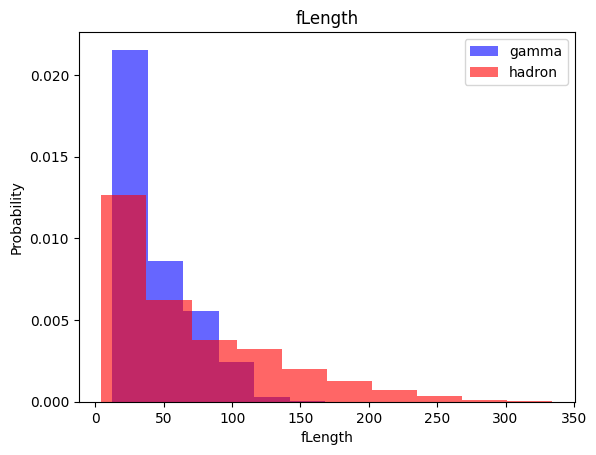

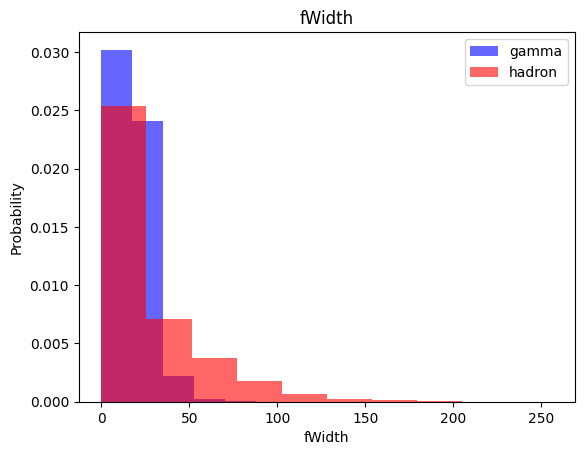

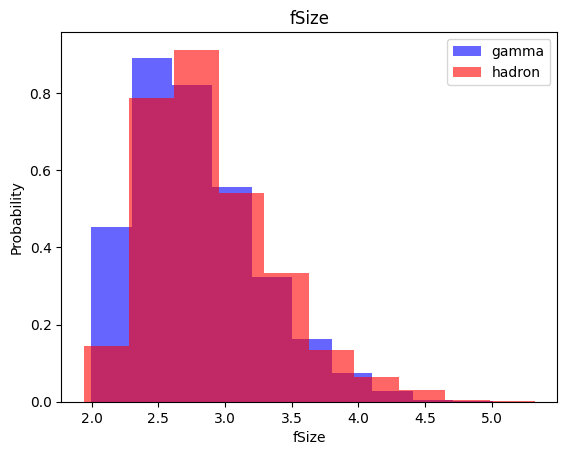

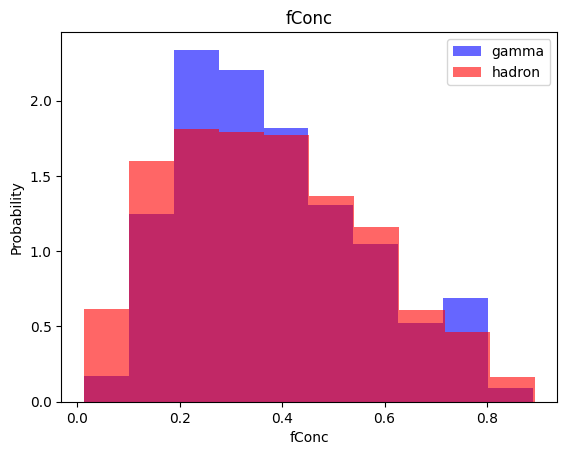

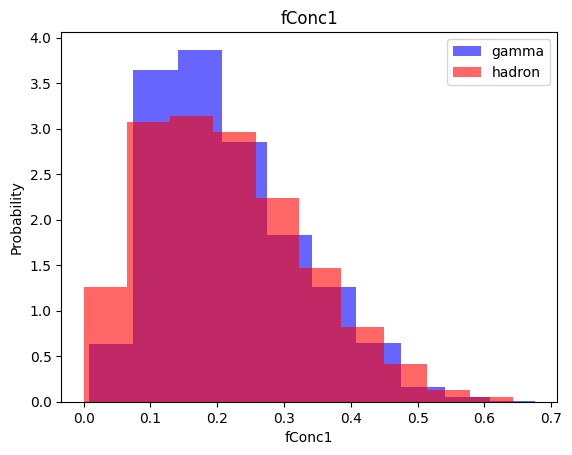

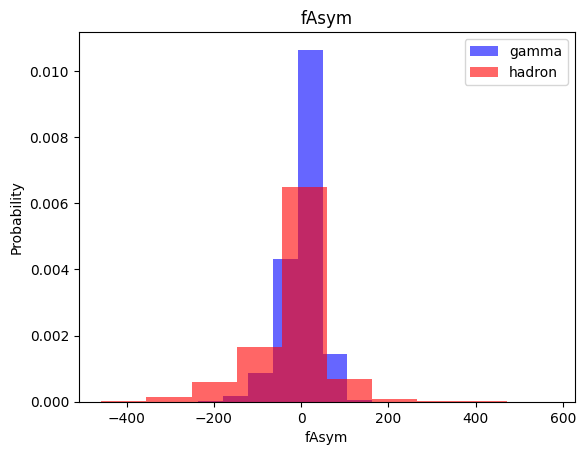

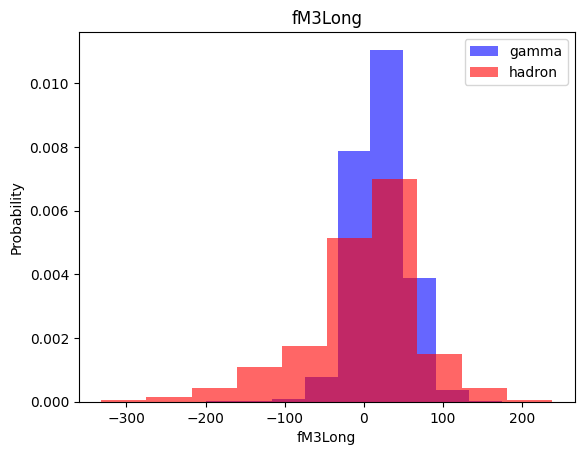

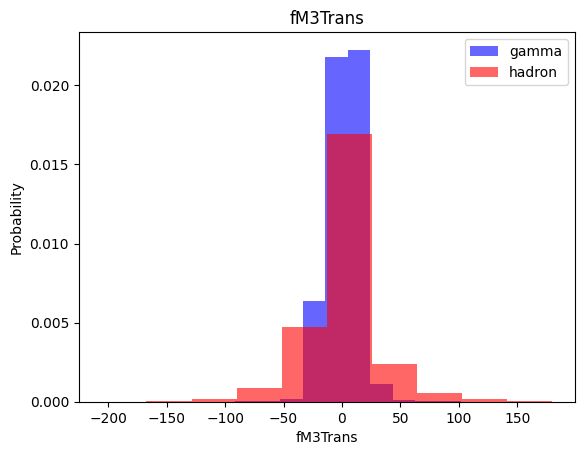

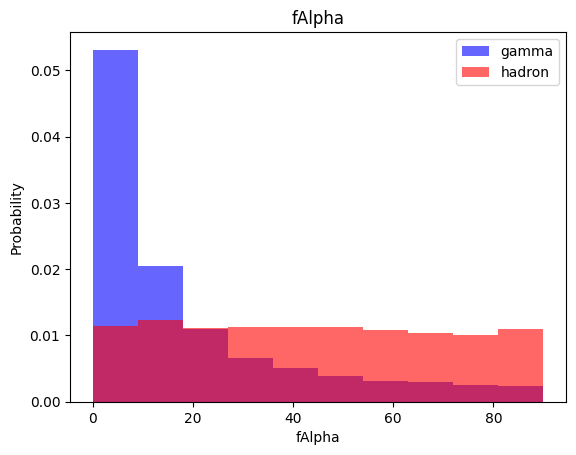

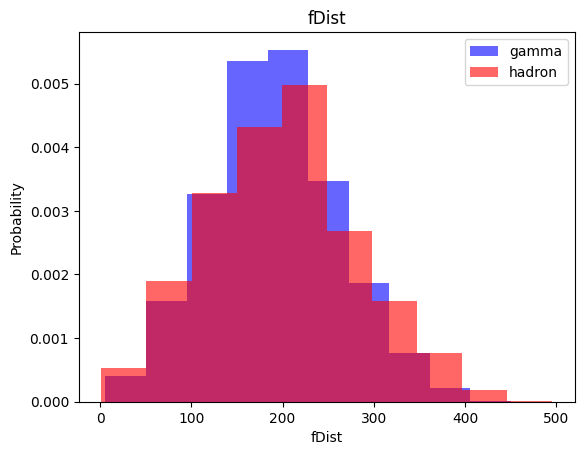

In [17]:
#by plotting each features with the outcome(gamma or hedron) we can compare how the features of outcomes related to each other
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.6, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.6, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

##**Divide the Dataset into train , validation and test datasets**

In [18]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
#.sample(frac=1) splits the dataset randomly
#[int(0.6*len(df)), int(0.8*len(df))] means we include the first 60 in train 61 to 80 in valid and 81 to 100 in test

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [19]:
def scale_dataset(dataframe):
  X = dataframe[dataframe.columns[:-1]].values  #all feature columns expect the last one
  y = dataframe[dataframe.columns[-1]].values   #last column

  scaler = StandardScaler()        # creating a instance of Standard Scaler for feature scaling
  X = scaler.fit_transform(X)      # fit and transform X by feature scaling

  # now we combine the whole data an a 2D numpy array
  data = np.hstack((X, np.reshape(y, (-1, 1))))
  # .hstack() horizontally combine the array (side by side)
  # X is a 2D object but y is a 1D vector so we call the np.reshape(y,(-1,1)) to convert it into a 2D object
  return data, X, y


In [20]:
print(len(train[train['class']==1]))  #gamma
print(len(train[train['class']==0]))  #hedron

7417
3926


In [21]:
#As the sample dataset between gamma and hedron have a huge difference , it can cause issues
#So we need to oversample the hedron data tuples

from imblearn.over_sampling import RandomOverSampler


In [22]:
def scale_dataset(dataframe, overSample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if overSample:   #oversampling the dataset for more precise result
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [23]:
#finalize training dataset
train, X_train, y_train = scale_dataset(train, overSample=True)

In [24]:
sum(y_train==1) #gamma

7417

In [25]:
sum(y_train==0) #hedron

7417

In [26]:
#Validation and Testing datasets
valid, X_valid, y_valid = scale_dataset(valid, overSample=False)
test, X_test, y_test = scale_dataset(test, overSample=False)

#**KNN Implementation**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [28]:
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
y_pred = knn_model.predict(X_test)

In [30]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [31]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1334
           1       0.86      0.88      0.87      2447

    accuracy                           0.83      3781
   macro avg       0.82      0.81      0.81      3781
weighted avg       0.83      0.83      0.83      3781





###Breakdown of the Report:

####Precision:

Definition: Precision is the ratio of true positive predictions to the total number of positive predictions made (i.e., true positives + false positives).
Interpretation: Precision answers the question, "Of all the items that the model predicted as positive (Class 1), how many were actually positive?"
Class 0: Precision = 0.74, meaning that 74% of the instances predicted as Class 0 were actually Class 0.
Class 1: Precision = 0.86, meaning that 86% of the instances predicted as Class 1 were actually Class 1.

####Recall:

Definition: Recall (also known as sensitivity or true positive rate) is the ratio of true positive predictions to the total number of actual positives (i.e., true positives + false negatives).
Interpretation: Recall answers the question, "Of all the actual positive items (Class 1), how many did the model correctly identify?"
Class 0: Recall = 0.73, meaning that 73% of the actual Class 0 instances were correctly identified.
Class 1: Recall = 0.86, meaning that 86% of the actual Class 1 instances were correctly identified.

####F1-Score:

Definition: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.
Interpretation: The F1-score is useful when you want to balance precision and recall, especially when you have an imbalanced dataset.
Class 0: F1-score = 0.74, indicating a balance between the precision and recall for Class 0.
Class 1: F1-score = 0.86, indicating a stronger balance between precision and recall for Class 1.

####Support:

Definition: Support is the number of actual occurrences of the class in the dataset.
Interpretation: It shows how many instances of each class were in the test set.
Class 0: Support = 1310, meaning there were 1310 instances of Class 0 in the dataset.
Class 1: Support = 2471, meaning there were 2471 instances of Class 1 in the dataset.

####Accuracy:

Definition: Accuracy is the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances.
Interpretation: Overall, the model correctly predicted 82% of the instances in the dataset.

####Macro Avg (Macro Average):

Definition: The macro average is the unweighted average of the precision, recall, and F1-score across all classes. It treats all classes equally, regardless of their support.
Interpretation: The macro average is useful when you want to understand the model's performance across classes, regardless of class imbalance.
Precision, Recall, and F1-score are all 0.80, indicating the model's balanced performance across both classes.

####Weighted Avg (Weighted Average):

Definition: The weighted average takes into account the support of each class when calculating the average. Classes with more instances contribute more to the average.
Interpretation: This metric is more representative of overall model performance, especially in cases of class imbalance.
Precision, Recall, and F1-score are all 0.82, reflecting the model's performance considering the number of instances in each class.

####Summary:

Class 0: Your model has a precision of 0.74, recall of 0.73, and an F1-score of 0.74 for this class.
Class 1: The model performs better with a precision of 0.86, recall of 0.86, and an F1-score of 0.86.
Overall Accuracy: The model has an accuracy of 82%.
Macro Average: The model's balanced performance across both classes is 0.80.
Weighted Average: Considering class distribution, the performance is slightly better at 0.82.
These metrics suggest that your model performs well overall, with slightly better performance on Class 1 compared to Class 0.

####link for image

https://drive.google.com/file/d/1ZDMTd9FEqCmwgbaVYXmLd7ye8TTmEwih/view?usp=drive_link

# **Naive Bayes Classification**

###Naive Assumption:

The "naive" part of Naive Bayes refers to the assumption that the features are independent of each other given the class label.
This means that the presence or absence of a particular feature is assumed to be unrelated to the presence or absence of any other
feature, given the class.

###Classification:

Given a set of features, Naive Bayes calculates the posterior probability for each class. The class with the highest posterior
probability is chosen as the predicted class.

###Pros:

**Simple and Fast:** Naive Bayes is computationally efficient and requires less training data.
**Works Well with High-Dimensional Data:** Particularly effective in high-dimensional data scenarios like text classification.
**Robust to Irrelevant Features:** Handles irrelevant features well due to the independence assumption.

###Cons:

**Strong Independence Assumption:** The main drawback is the naive assumption of feature independence, which is often unrealistic.
**Not Great with Continuous Features:** Gaussian Naive Bayes assumes a normal distribution, which may not always fit the data.

###Common Use Cases:
**Text Classification:** Spam detection, sentiment analysis, topic classification.
**Document Categorization:** Organizing documents into categories based on their content.
**Medical Diagnosis:** For simple diagnostic systems where independence of symptoms is assumed.

###Gaussian Naive Bayes:

Assumes that the features follow a Gaussian (normal) distribution.
Suitable for continuous data.

####Multinomial Naive Bayes:

Suitable for discrete data, particularly word counts in text classification.
Commonly used for document classification problems like spam detection or sentiment analysis.

###Bernoulli Naive Bayes:

Suitable for binary/boolean features.
Typically used for binary feature models, where features represent the presence or absence of a characteristic.

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [35]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52      1334
           1       0.74      0.89      0.81      2447

    accuracy                           0.73      3781
   macro avg       0.71      0.66      0.67      3781
weighted avg       0.72      0.73      0.71      3781



In [36]:
from sklearn.naive_bayes import BernoulliNB

In [37]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [38]:
y_pred = bnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.66      1334
           1       0.85      0.69      0.76      2447

    accuracy                           0.72      3781
   macro avg       0.71      0.73      0.71      3781
weighted avg       0.75      0.72      0.73      3781



#**Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1334
           1       0.85      0.82      0.83      2447

    accuracy                           0.79      3781
   macro avg       0.77      0.77      0.77      3781
weighted avg       0.79      0.79      0.79      3781



# **Support Vector Machine**

Support Vector Machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks. SVMs can be used for a variety of tasks, such as text classification, image classification, spam detection, handwriting identification, gene expression analysis, face detection, and anomaly detection. SVMs are adaptable and efficient in a variety of applications because they can manage high-dimensional data and nonlinear relationships.

SVM algorithms are very effective as we try to find the maximum separating hyperplane between the different classes available in the target feature.

**Best Suited for Classification**

The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three.

Link -> https://www.geeksforgeeks.org/support-vector-machine-algorithm/

In [43]:
from sklearn.svm import SVC

In [44]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [46]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1334
           1       0.89      0.91      0.90      2447

    accuracy                           0.87      3781
   macro avg       0.86      0.85      0.86      3781
weighted avg       0.87      0.87      0.87      3781

